FLIGHT TASK

In [123]:
#Import
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [124]:
#import the flight.csv
df = pd.read_csv("flight.csv")

df

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest
0,0,2013-1-1 05:40:00,2013-1-1 05:42:00,2013-1-1 09:23:00,2013-1-1 08:50:00,1141,JFK,MIA
1,1,2013-1-1 06:00:00,2013-1-1 05:54:00,2013-1-1 08:12:00,2013-1-1 08:37:00,461,LGA,ATL
2,2,2013-1-1 05:58:00,2013-1-1 05:54:00,2013-1-1 07:40:00,2013-1-1 07:28:00,1696,EWR,ORD
3,3,2013-1-1 06:00:00,2013-1-1 05:55:00,2013-1-1 09:13:00,2013-1-1 08:54:00,507,EWR,FLL
4,4,2013-1-1 06:00:00,2013-1-1 05:57:00,2013-1-1 08:38:00,2013-1-1 08:46:00,79,JFK,MCO
...,...,...,...,...,...,...,...,...
121422,123979,2013-9-30 21:37:00,2013-9-30 21:47:00,2013-9-30 00:30:00,2013-9-30 00:27:00,1371,LGA,FLL
121423,123980,2013-9-30 21:56:00,2013-9-30 21:49:00,2013-9-30 22:45:00,2013-9-30 23:08:00,523,EWR,BOS
121424,123981,2013-9-30 21:13:00,2013-9-30 22:33:00,2013-9-30 01:12:00,2013-9-30 00:30:00,471,EWR,SFO
121425,123982,2013-9-30 20:01:00,2013-9-30 22:35:00,2013-9-30 00:59:00,2013-9-30 22:49:00,1083,JFK,MCO


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121427 entries, 0 to 121426
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      121427 non-null  int64 
 1   datetime_val    121427 non-null  object
 2   dep_time        121427 non-null  object
 3   arr_time        121427 non-null  object
 4   sched_arr_time  121427 non-null  object
 5   flight          121427 non-null  int64 
 6   origin          121427 non-null  object
 7   dest            121427 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.4+ MB


Convert the columns below to datetime

To convert multiple columns to datetime type within a DataFrame, you can use the pd.to_datetime function for each of the columns you want to convert. Here's how you can do it for columns datetime_val, dep_time, arr_time, and sched_arr_time:

In [126]:
#the errors='coerce' parameter will convert the values it can while assigning a NaN value for any values it cannot parse:
df['datetime_val'] = pd.to_datetime(df['datetime_val'] , errors="coerce")
df['dep_time'] = pd.to_datetime(df['dep_time'] , errors="coerce")
df['arr_time'] = pd.to_datetime(df['arr_time'] , errors="coerce")
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'], errors="coerce")

Checking the types again

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121427 entries, 0 to 121426
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      121427 non-null  int64         
 1   datetime_val    121427 non-null  datetime64[ns]
 2   dep_time        121421 non-null  datetime64[ns]
 3   arr_time        121379 non-null  datetime64[ns]
 4   sched_arr_time  121427 non-null  datetime64[ns]
 5   flight          121427 non-null  int64         
 6   origin          121427 non-null  object        
 7   dest            121427 non-null  object        
dtypes: datetime64[ns](4), int64(2), object(2)
memory usage: 7.4+ MB


Some flights go past midnight as well, but the dataset don’t handle this. So a plain that took off 2013-01-01 23:57:00 and landed 2013-01-02 02:57:00 will come up in the dataset as 01-01 23:57:00 -> 01-01 02:57:00 (negative flight time)

In [128]:
for index, row in df.iterrows():
    #if arr_time is less then dep_time
    if (row['arr_time']<row['dep_time']):
        #add one day to arr_time
        df.loc[index, 'arr_time'] = (row['arr_time'])+ datetime.timedelta(days=1)
    if (row['sched_arr_time']<row['dep_time']):
        df.loc[index, 'sched_arr_time'] = (row['sched_arr_time'])+ datetime.timedelta(days=1)
      

In [129]:
late_flights = df[df['dep_time'].dt.hour >= 23]
late_flights.head()

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest
626,628,2013-01-02 21:55:00,2013-01-02 23:37:00,2013-01-03 02:22:00,2013-01-03 00:41:00,43,JFK,MCO
949,954,2013-01-03 22:58:00,2013-01-03 23:22:00,2013-01-04 00:18:00,2013-01-04 00:02:00,1018,JFK,BOS
1275,1283,2013-01-04 22:55:00,2013-01-04 23:07:00,2013-01-05 00:17:00,2013-01-04 23:59:00,1018,JFK,BOS
1539,1547,2013-01-05 21:55:00,2013-01-05 23:19:00,2013-01-06 02:02:00,2013-01-06 00:41:00,43,JFK,MCO
1839,1848,2013-01-06 22:55:00,2013-01-06 23:13:00,2013-01-07 00:12:00,2013-01-06 23:59:00,1018,JFK,BOS


Adding a column called air_time

In [130]:
df['air_time'] = (df['arr_time'] - df['dep_time'])

show content

In [131]:
df.head()

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00


Look up for how the air_time calculation is affected by flights over midnight

In [132]:
late_flights = df[df['dep_time'].dt.hour >= 23]
late_flights.head()

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time
626,628,2013-01-02 21:55:00,2013-01-02 23:37:00,2013-01-03 02:22:00,2013-01-03 00:41:00,43,JFK,MCO,0 days 02:45:00
949,954,2013-01-03 22:58:00,2013-01-03 23:22:00,2013-01-04 00:18:00,2013-01-04 00:02:00,1018,JFK,BOS,0 days 00:56:00
1275,1283,2013-01-04 22:55:00,2013-01-04 23:07:00,2013-01-05 00:17:00,2013-01-04 23:59:00,1018,JFK,BOS,0 days 01:10:00
1539,1547,2013-01-05 21:55:00,2013-01-05 23:19:00,2013-01-06 02:02:00,2013-01-06 00:41:00,43,JFK,MCO,0 days 02:43:00
1839,1848,2013-01-06 22:55:00,2013-01-06 23:13:00,2013-01-07 00:12:00,2013-01-06 23:59:00,1018,JFK,BOS,0 days 00:59:00


Make the % delay column

In [133]:
df['Delay'] = (df['arr_time'] - df['sched_arr_time'])
df['percent_delay'] = (100 * df['Delay']) / df['air_time']
df.head(10)

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,Delay,percent_delay
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,-18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,-4.968944
5,5,2013-01-01 06:00:00,2013-01-01 05:58:00,2013-01-01 07:53:00,2013-01-01 07:45:00,301,LGA,ORD,0 days 01:55:00,0 days 00:08:00,6.956522
6,6,2013-01-01 06:00:00,2013-01-01 05:58:00,2013-01-01 09:24:00,2013-01-01 09:17:00,194,JFK,LAX,0 days 03:26:00,0 days 00:07:00,3.398058
7,7,2013-01-01 06:00:00,2013-01-01 05:58:00,2013-01-01 09:23:00,2013-01-01 09:37:00,1124,EWR,SFO,0 days 03:25:00,-1 days +23:46:00,-6.829268
8,8,2013-01-01 05:59:00,2013-01-01 05:59:00,2013-01-01 07:02:00,2013-01-01 07:06:00,1806,JFK,BOS,0 days 01:03:00,-1 days +23:56:00,-6.349206
9,9,2013-01-01 06:00:00,2013-01-01 06:00:00,2013-01-01 08:51:00,2013-01-01 08:58:00,371,LGA,FLL,0 days 02:51:00,-1 days +23:53:00,-4.093567


Plotbox

<Axes: >

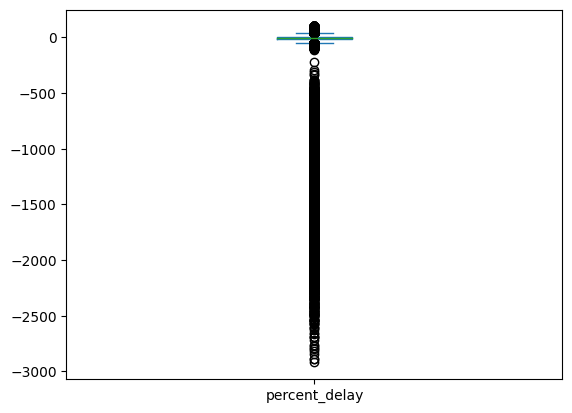

In [134]:
df["percent_delay"].plot.box()

The plotbox has many outliners

In [135]:
df["percent_delay"].describe()

count    121373.000000
mean        -29.735566
std         206.591444
min       -2919.565217
25%         -14.838710
50%          -4.864865
75%           6.172840
max         100.000000
Name: percent_delay, dtype: float64

In [136]:
minrow= df["percent_delay"].argmin()

In [137]:
df.iloc[minrow]

Unnamed: 0                      60788
datetime_val      2013-04-01 20:40:00
dep_time          2013-04-01 22:45:00
arr_time          2013-04-01 23:31:00
sched_arr_time    2013-04-02 21:54:00
flight                           1178
origin                            EWR
dest                              BOS
air_time              0 days 00:46:00
Delay               -1 days +01:37:00
percent_delay            -2919.565217
Name: 59583, dtype: object

By analyzing the row with minimum value, we can conclude that these values most probably are a dataset error. We can try to fix the values, but lets just remove outliers.

Finding outliers This is a huge dataset, and the hacky way to fix negative airtime, don't work 100%, so lets remove some outliers. Do a df["percent_delay"].plot.box() to check outliers, and a df["percent_delay"].describe() to see the min and max values To make it easy to do remove outliers later on, lets make it a function:

In [138]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df

In [139]:
df["percent_delay"] = remove_outlier(df["percent_delay"])

Present the plotbox again..

<Axes: >

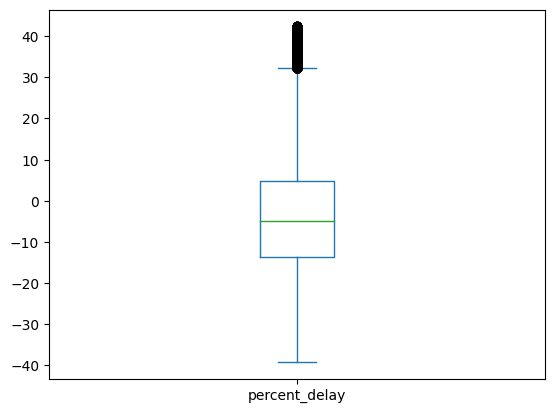

In [140]:
df["percent_delay"].plot.box()

In [ ]:
End.